<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/Projects/blob/main/X-ray%20Implant%20Identification/Implant_data___Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pathlib
import random
import matplotlib.image as mpimg
import os
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Implant_data/train

Isola  Legacy  M8M10  Reline  Viper  Xia


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

 Akram/              Implant_data_aug/      'School '/
'Colab Notebooks'/   Implant_data_cleaned/   synthetic_data_28oct/
 Implant_data/       reference_oct19/


#Data Augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [ ]:
#data augmentation
data_augmentation = Sequential([
                                preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),

  preprocessing.Rescaling(1./255) # if you're using a model such as ResNet50V2, you'll need to rescale your data
  ], name="data_augmentation"
)

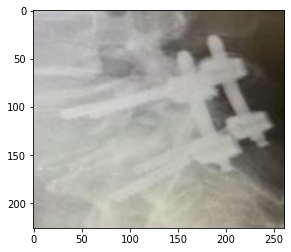

In [ ]:
augmented = data_augmentation(tf.expand_dims(test1,axis=0))
plt.imshow(tf.squeeze(augmented))

In [ ]:
tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = 'Implant_data/train'
test_dir = 'Implant_data/test'

# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode="categorical",shuffle=True)

valid_data=train_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode="categorical",shuffle=True)

Found 553 images belonging to 6 classes.
Found 114 images belonging to 6 classes.


In [ ]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(6, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=int(len(valid_data)), # validate for less steps
                    # Track model training logs
                )

Epoch 1/5
18/18 [==============================] - 26s 821ms/step - loss: 1.7645 - accuracy: 0.2297 - val_loss: 1.7194 - val_accuracy: 0.3070
Epoch 2/5
18/18 [==============================] - 10s 571ms/step - loss: 1.7427 - accuracy: 0.2640 - val_loss: 1.7281 - val_accuracy: 0.3070
Epoch 3/5
18/18 [==============================] - 9s 489ms/step - loss: 1.7494 - accuracy: 0.2694 - val_loss: 1.7156 - val_accuracy: 0.3070
Epoch 4/5
18/18 [==============================] - 9s 489ms/step - loss: 1.7469 - accuracy: 0.2459 - val_loss: 1.7138 - val_accuracy: 0.3070
Epoch 5/5
18/18 [==============================] - 9s 492ms/step - loss: 1.7348 - accuracy: 0.2694 - val_loss: 1.7157 - val_accuracy: 0.3070


# Augmentation through augmentor

In [ ]:
pip install Augmentor

In [ ]:
import os      
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16, VGG19
#from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization


from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import SeparableConv2D


from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as mat
import argparse
import Augmentor
import cv2
import os
import pandas as pd
import shutil
import random
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2
import os

In [ ]:
def to_grey(img):
  img=np.array(img)

  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  return cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)

In [ ]:
#The next following code will convert four channels images into images with three channels and save them as jpg format in original place and deleted the old one.

# for clas in os.listdir('/content/drive/MyDrive/Implant_data/train/'):
#   for i in os.listdir('/content/drive/MyDrive/Implant_data/train/'+clas):
#     img = mpimg.imread('/content/drive/MyDrive/Implant_data/train/'+clas+'/'+i)
#     if len(img.shape)>2:
#       if img.shape[2]==4:
#         img = to_grey(img)
#         min_val,max_val=img.min(),img.max()
#         img = 255.0*(img - min_val)/(max_val - min_val)
#         img = img.astype(np.uint8)
#         cv2.imwrite('/content/drive/MyDrive/Implant_data/train/'+clas+'/'+i+'.jpg',img)
#         os.remove('/content/drive/MyDrive/Implant_data/train/'+clas+'/'+i)

In [ ]:
x = Augmentor.Pipeline('/content/drive/MyDrive/Implant_data/train')
x.rotate(probability=0.5, max_left_rotation=25, max_right_rotation=25)
x.random_distortion(probability=0.7, grid_width=4, grid_height=4, magnitude=8)
x.flip_left_right(probability=0.3)
x.rotate180(probability=0.2)
x.crop_centre(0.2,0.5)
x.shear(0.5,25,25)
x.crop_random(0.4,0.5)
x.process()
x.sample(500) #generate 500 augmented images based on your specifications

Initialised with 553 image(s) found.
Output directory set to /content/drive/MyDrive/Implant_data/train/output.

Processing <PIL.Image.Image image mode=RGB size=76x121 at 0x7F5C8DAB3CD0>: 100%|██████████| 553/553 [00:31<00:00, 17.53 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=269x185 at 0x7F5C8DAB6510>: 100%|██████████| 500/500 [00:25<00:00, 19.32 Samples/s]


In [ ]:
#checking number of images with four channels in new data
c=0
for clas in os.listdir('/content/drive/MyDrive/Implant_data/train/output'):
  for i in os.listdir('/content/drive/MyDrive/Implant_data/train/output/'+clas):
    img = mpimg.imread('/content/drive/MyDrive/Implant_data/train/output/'+clas+'/'+i)
    if len(img.shape)>2:
      if img.shape[2]==4:
        c=c+1

print(c)

0


In [ ]:
# number of images in each class in original data
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames, in os.walk('Implant_data'):
  print('There are ',len(dirnames), 'directories and ', len(filenames), 'images in',dirpath)

There are  2 directories and  0 images in Implant_data
There are  6 directories and  0 images in Implant_data/train
There are  0 directories and  66 images in Implant_data/train/Isola
There are  0 directories and  121 images in Implant_data/train/Legacy
There are  0 directories and  50 images in Implant_data/train/M8M10
There are  0 directories and  73 images in Implant_data/train/Reline
There are  0 directories and  94 images in Implant_data/train/Xia
There are  0 directories and  149 images in Implant_data/train/Viper
There are  6 directories and  0 images in Implant_data/test
There are  0 directories and  26 images in Implant_data/test/Legacy
There are  0 directories and  13 images in Implant_data/test/Isola
There are  0 directories and  8 images in Implant_data/test/Reline
There are  0 directories and  11 images in Implant_data/test/M8M10
There are  0 directories and  21 images in Implant_data/test/Xia
There are  0 directories and  35 images in Implant_data/test/Viper


In [ ]:
# number of images in each class in augmented data

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames, in os.walk('Implant_data_aug'):
  print('There are ',len(dirnames), 'directories and ', len(filenames), 'images in',dirpath)

There are  2 directories and  0 images in Implant_data_aug
There are  6 directories and  0 images in Implant_data_aug/test
There are  0 directories and  35 images in Implant_data_aug/test/Viper
There are  0 directories and  26 images in Implant_data_aug/test/Legacy
There are  0 directories and  11 images in Implant_data_aug/test/M8M10
There are  0 directories and  13 images in Implant_data_aug/test/Isola
There are  0 directories and  8 images in Implant_data_aug/test/Reline
There are  0 directories and  21 images in Implant_data_aug/test/Xia
There are  6 directories and  0 images in Implant_data_aug/train
There are  0 directories and  250 images in Implant_data_aug/train/M8M10
There are  0 directories and  338 images in Implant_data_aug/train/Isola
There are  0 directories and  341 images in Implant_data_aug/train/Reline
There are  0 directories and  583 images in Implant_data_aug/train/Legacy
There are  0 directories and  706 images in Implant_data_aug/train/Viper
There are  0 directo

### A model without augmentation

In [ ]:
tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = 'Implant_data/train'
test_dir = 'Implant_data/test'

# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(128,128),color_mode='rgb',class_mode="categorical",shuffle=True,)

valid_data=train_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(128,128),color_mode='rgb',class_mode="categorical",shuffle=True)

Found 553 images belonging to 6 classes.
Found 114 images belonging to 6 classes.


In [ ]:
# initialize the initial learning rate, number of epochs, and batch size
INIT_LR = 1e-3
EPOCHS = 12
BS = 32

In [ ]:
#baseModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
#baseModel = VGG19(weights="imagenet", include_top=False,input_tensor=Input(shape=(128, 128, 3)))
baseModel = DenseNet201(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

74850304/74836368 [==============================] - 1s 0us/step


In [ ]:
# construct the head of the model that will be placed on top of the
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4,4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(6, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)
callbacks = [EarlyStopping(monitor='val_loss', patience=8),ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
# compile our model
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the head of the network
H = model.fit(train_data, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=int(len(valid_data)),
              shuffle=True, epochs=EPOCHS,callbacks=callbacks)

Epoch 1/12
18/18 [==============================] - 148s 7s/step - loss: 1.9244 - accuracy: 0.1971 - val_loss: 1.6908 - val_accuracy: 0.2807
Epoch 2/12
18/18 [==============================] - 7s 383ms/step - loss: 1.6669 - accuracy: 0.3020 - val_loss: 1.6544 - val_accuracy: 0.2719
Epoch 3/12
18/18 [==============================] - 5s 283ms/step - loss: 1.5549 - accuracy: 0.3888 - val_loss: 1.6648 - val_accuracy: 0.3246
Epoch 4/12
18/18 [==============================] - 5s 251ms/step - loss: 1.4478 - accuracy: 0.4376 - val_loss: 1.6917 - val_accuracy: 0.2807
Epoch 5/12
18/18 [==============================] - 9s 493ms/step - loss: 1.2905 - accuracy: 0.5099 - val_loss: 1.6458 - val_accuracy: 0.3158
Epoch 6/12
18/18 [==============================] - 5s 252ms/step - loss: 1.2473 - accuracy: 0.5099 - val_loss: 1.6975 - val_accuracy: 0.3070
Epoch 7/12
18/18 [==============================] - 5s 268ms/step - loss: 1.1573 - accuracy: 0.5570 - val_loss: 1.6615 - val_accuracy: 0.3333
Epoch 8

###  A model with augmentation

In [ ]:
tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = 'Implant_data_aug/train'
test_dir = 'Implant_data_aug/test'

# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode="categorical",shuffle=True,)

valid_data=train_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode="categorical",shuffle=True)

Found 2659 images belonging to 6 classes.
Found 114 images belonging to 6 classes.


In [ ]:
# initialize the initial learning rate, number of epochs, and batch size
INIT_LR = 1e-3
EPOCHS = 12
BS = 32

In [ ]:
baseModel = DenseNet201(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
# construct the head of the model that will be placed on top of the
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4,4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(6, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)
callbacks = [EarlyStopping(monitor='val_loss', patience=8),ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
# compile our model
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the head of the network
H = model.fit(train_data, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=int(len(valid_data)),
              shuffle=True, epochs=EPOCHS,callbacks=callbacks)

Epoch 1/12
84/84 [==============================] - 451s 5s/step - loss: 1.7585 - accuracy: 0.2757 - val_loss: 1.5958 - val_accuracy: 0.2982
Epoch 2/12
84/84 [==============================] - 32s 375ms/step - loss: 1.5755 - accuracy: 0.3648 - val_loss: 1.5499 - val_accuracy: 0.4298
Epoch 3/12
84/84 [==============================] - 29s 339ms/step - loss: 1.4447 - accuracy: 0.4205 - val_loss: 1.5826 - val_accuracy: 0.4211
Epoch 4/12
84/84 [==============================] - 29s 338ms/step - loss: 1.3740 - accuracy: 0.4573 - val_loss: 1.5966 - val_accuracy: 0.3772
Epoch 5/12
84/84 [==============================] - 29s 338ms/step - loss: 1.2374 - accuracy: 0.5303 - val_loss: 1.6489 - val_accuracy: 0.4561
Epoch 6/12
84/84 [==============================] - 28s 337ms/step - loss: 1.1325 - accuracy: 0.5750 - val_loss: 1.5894 - val_accuracy: 0.4825
Epoch 7/12
84/84 [==============================] - 30s 356ms/step - loss: 1.0145 - accuracy: 0.6284 - val_loss: 1.8109 - val_accuracy: 0.4298
E

### fastai

In [ ]:
!pip install fastai --upgrade

In [ ]:
!pip install fastai==2.2.5


In [ ]:
from fastai.vision.all import *

In [ ]:
def to_grayscale(img):
  return img.convert('L')

class GreyScaleTfm(Transform):
  def encodes(self, img: Image.Image):
    return to_grayscale(img)

img_size = 224

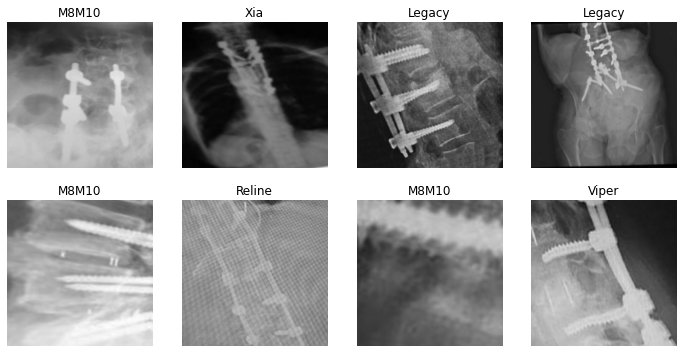

In [ ]:
str='/content/drive/MyDrive/Implant_data_aug/train'
p = Path(str)
dls = ImageDataLoaders.from_folder(p, train='train', valid_pct=0.2, bs=8, item_tfms=[GreyScaleTfm(order=0), Resize(img_size, method='squish', order=1)],batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)])
files = get_image_files(p)
len(files)
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(50)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,2.563416,2.024187,0.370998,01:16


epoch,train_loss,valid_loss,accuracy,time
0,1.764497,1.448637,0.465160,01:23
1,1.603212,1.197114,0.555556,01:23
2,1.376252,1.157776,0.557439,01:24
3,1.283079,1.113782,0.583804,01:23
4,1.245400,1.115179,0.610169,01:22
5,1.104051,1.066127,0.623352,01:22
6,0.966277,0.915564,0.676083,01:22
7,0.953271,0.965733,0.683616,01:23
8,0.970372,0.995251,0.679849,01:23
9,0.889532,0.958797,0.685499,01:22


In [ ]:
testFolder='/content/drive/MyDrive/Implant_data_aug/test/'
files = get_image_files(testFolder)
files

(#114) [Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/image003_test222.jpg'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/img_5772.jpg'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/expedium_ pmc3170270_1.png'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/spinal_xray_789__ML.jpg'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/facebook_7473_ML.jpg'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/viper_ pmc3809439_1.png'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/spinal_xray_81_ML.jpg'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/image002_test_209.png'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/expedium_xray3.png'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/facebook_4737_ML.jpg')...]

In [ ]:
counter=0
correct=0
for i in os.listdir('/content/drive/MyDrive/Implant_data_aug/test'):
  for j in os.listdir('/content/drive/MyDrive/Implant_data_aug/test/'+i):
    counter=counter+1
    p=learn.predict('/content/drive/MyDrive/Implant_data_aug/test/'+i+'/'+j)
    if p[0]==i:
      correct=correct+1
print(counter,correct) 

114 53


In [ ]:
print('the accuracy of the test data:')
correct/counter


0.4649122807017544